In [1]:
#Análise de vendas com kmeans
#autor: Fernando Schmitt

In [2]:
#adquirindo e tratando os dados

In [3]:
import pandas as pd
import psycopg2


In [4]:
#criando conexão com o banco de dados
con= psycopg2.connect(host= 'localhost', database= 'fernando', user='postgres', password= '88227874', port= 5432)


In [5]:
#criando consulta e acesso as tabelas do banco de dados
cursor1= con.cursor()
consulta1= 'select * from vendas'
cursor1.execute(consulta1)
retorno1= cursor1.fetchall()

In [6]:
cursor2= con.cursor()
consulta2= 'select * from clientes '
cursor2.execute(consulta2)
retorno2= cursor2.fetchall()

In [7]:
#carregando as consultas em dataframes
df1= pd.DataFrame(retorno1, columns=['Id_venda', 'Id_vendedor','Cliente', 'Data','Total'])
df2= pd.DataFrame(retorno2, columns=['Id_cliente','Cliente', 'Estado', 'Gênero', 'Status'])

In [8]:
#unindo os dataframes
df3= pd.concat([df1,df2])
df3

,Id_venda,Id_vendedor,Cliente,Data,Total,Id_cliente,Estado,Gênero,Status
0,1.0,1.0,1,2016-01-01,8053.60,NaN,NaN,NaN,NaN
1,2.0,6.0,185,2016-01-01,150.40,NaN,NaN,NaN,NaN
2,3.0,7.0,31,2016-01-02,6087.00,NaN,NaN,NaN,NaN
3,4.0,5.0,1,2016-01-02,13828.60,NaN,NaN,NaN,NaN
4,5.0,8.0,120,2016-01-03,26096.66,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
245,NaN,NaN,Joana Ataí,NaN,NaN,246.0,GO,F,Platinum
246,NaN,NaN,Joaquim Hurtado,NaN,NaN,247.0,AP,M,Silver
247,NaN,NaN,Joaquim Mieiro,NaN,NaN,248.0,TO,M,Silver
248,NaN,NaN,Joaquina Vasconcelos,NaN,NaN,249.0,SC,F,Silver


In [9]:
#tratando colunas com valores faltantes
df3.isnull().sum()

Id_venda       250
Id_vendedor    250
Cliente          0
Data           250
Total          250
Id_cliente     400
Estado         400
Gênero         400
Status         400
dtype: int64

In [10]:
df3['Id_venda'].fillna('0', inplace= True)
df3['Id_vendedor'].fillna('0', inplace= True)
df3['Data'].fillna('2016-01-01', inplace= True)

In [11]:
total= df3['Total'].mean()
df3['Total'].fillna(total, inplace= True)

In [12]:
df3['Id_cliente'].fillna('0', inplace= True)
estado= df3['Estado'].mode()
df3['Estado'].fillna('SC', inplace= True)
estado

0    SC
dtype: object

In [13]:
genero= df3['Gênero'].mode()
df3['Gênero'].fillna('M', inplace= True)
genero

0    M
dtype: object

In [14]:
status= df3['Status'].mode()
df3['Status'].fillna('Silver', inplace= True)
status

0    Silver
dtype: object

In [15]:
#dataframe após as modificações
df3.isnull().sum()

Id_venda       0
Id_vendedor    0
Cliente        0
Data           0
Total          0
Id_cliente     0
Estado         0
Gênero         0
Status         0
dtype: int64

In [16]:
df3

,Id_venda,Id_vendedor,Cliente,Data,Total,Id_cliente,Estado,Gênero,Status
0,1.0,1.0,1,2016-01-01,8053.60,0,SC,M,Silver
1,2.0,6.0,185,2016-01-01,150.40,0,SC,M,Silver
2,3.0,7.0,31,2016-01-02,6087.00,0,SC,M,Silver
3,4.0,5.0,1,2016-01-02,13828.60,0,SC,M,Silver
4,5.0,8.0,120,2016-01-03,26096.66,0,SC,M,Silver
...,...,...,...,...,...,...,...,...,...
245,0,0,Joana Ataí,2016-01-01,7635.406825,246.0,GO,F,Platinum
246,0,0,Joaquim Hurtado,2016-01-01,7635.406825,247.0,AP,M,Silver
247,0,0,Joaquim Mieiro,2016-01-01,7635.406825,248.0,TO,M,Silver
248,0,0,Joaquina Vasconcelos,2016-01-01,7635.406825,249.0,SC,F,Silver


In [17]:
#preparando e criando modelo k means

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [19]:
le= LabelEncoder()
df3 = df3.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df3

,Id_venda,Id_vendedor,Cliente,Data,Total,Id_cliente,Estado,Gênero,Status
0,1,1,0,0,300,0,23,2,2
1,112,7,51,0,70,0,23,2,2
2,223,8,97,1,257,0,23,2,2
3,334,6,0,1,60,0,23,2,2
4,346,9,14,2,158,0,23,2,2
...,...,...,...,...,...,...,...,...,...
245,0,0,382,0,285,164,8,0,1
246,0,0,383,0,285,165,3,2,2
247,0,0,384,0,285,166,26,2,2
248,0,0,385,0,285,167,23,0,2


In [20]:
cluster= KMeans(n_clusters= 3)
cluster.fit(df3)

KMeans(n_clusters=3)

In [21]:
centros= cluster.cluster_centers_
centros

array([[ 2.94301887e+02,  5.51886792e+00,  7.05000000e+01,
         1.43900943e+02,  1.68561321e+02,  1.42108547e-13,
         2.30000000e+01,  2.00000000e+00,  2.00000000e+00],
       [-7.38964445e-13,  5.77315973e-15,  2.60500000e+02,
        -2.70006240e-13,  2.85000000e+02,  1.25500000e+02,
         1.28280000e+01,  1.03600000e+00,  1.90800000e+00],
       [ 9.47234043e+01,  5.07446809e+00,  6.88138298e+01,
         9.82819149e+01,  1.66978723e+02,  1.20792265e-13,
         2.30000000e+01,  2.00000000e+00,  2.00000000e+00]])

In [22]:
previsor= cluster.labels_
previsor

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
unicos,quantidade= np.unique(previsor, return_counts= True)
unicos

array([0, 1, 2], dtype=int32)

In [24]:
quantidade

array([212, 250, 188])

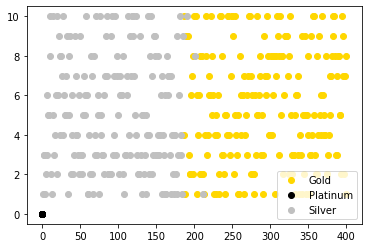

In [44]:
x= np.array(df3)
plt.scatter(x[previsor == 0, 0], x[previsor == 0, 1], 
            c = 'gold', label = 'Gold')
plt.scatter(x[previsor == 1, 0], x[previsor == 1, 1], 
            c = 'black', label = 'Platinum')
plt.scatter(x[previsor == 2, 0], x[previsor == 2, 1], 
            c = 'silver', label = 'Silver')
plt.legend()